<a href="https://colab.research.google.com/github/Gowthamrn5/CSS_Fonts_sites/blob/main/Data_Visualisation_University_of_Roehampton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment**
World Covid-19 Visualization with Python

Task 1:

Start by choosing 5 questions you'd like 5 visualisations to answer.
Design and plot (in Python) a static visualisation (i.e., a single plot) that you believe effectively answers one of the questions and use the question as the title of your graphic.
Provide a short write-up (no more than 2 paragraphs) describing your plot design and display.
While you must use the data sets given:


   
*   You are free to transform the data as you see fit. Such transforms may include (but are not limited to) log transformation, computing percentages or averages, grouping elements into new categories, or removing unnecessary variables or records. 
*   our chart image should be interpretable without recourse to your short write-up. 

*   Do not forget to include title, axis labels or legends as needed!
*   As different visualisations can emphasize different aspects of a data set, you should document what aspects of the data you are attempting to most effectively communicate. 




In [15]:
#This functions for working in domain of linear algebra, fourier transform, and matrices.
import numpy as np
#This use for data science/data analysis and machine learning tasks
import pandas as pd
#Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations
import matplotlib as mpl
#Matplotlib is a library for data visualization, typically in the form of plots, graphs and charts
import matplotlib.pyplot as plt
#%matplotlib inline enables the drawing of matplotlib figures in the IPython environment
%matplotlib inline 
#Seaborn is a library that uses Matplotlib underneath to plot graphs. It will be used to visualize random distributions.
import seaborn as sns
#ggplot2 is a plotting package that provides helpful commands to create complex plots from data in a data frame. 
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine.data import mtcars
import math
import plotly.express as px 
import plotly.graph_objects as go
import plotly.io as pio
from datetime import datetime,date

In [16]:
data = pd.read_csv("//content/drive/MyDrive/country_wise_latest.csv")
data1 = pd.read_csv("/content/drive/MyDrive/covid_19_clean_complete.csv")

In [17]:
data.head

<bound method NDFrame.head of          Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0           Afghanistan      36263    1269      25198    9796        106   
1               Albania       4880     144       2745    1991        117   
2               Algeria      27973    1163      18837    7973        616   
3               Andorra        907      52        803      52         10   
4                Angola        950      41        242     667         18   
..                  ...        ...     ...        ...     ...        ...   
182  West Bank and Gaza      10621      78       3752    6791        152   
183      Western Sahara         10       1          8       1          0   
184               Yemen       1691     483        833     375         10   
185              Zambia       4552     140       2815    1597         71   
186            Zimbabwe       2704      36        542    2126        192   

     New deaths  New recovered  Deaths / 100 Cases  Recov

In [18]:
#Checking how many missing values are 
data.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [20]:
data.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [21]:
data1.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

Question 01 :  Show a graph from WHO region Death 

In [22]:
who = data.groupby('WHO Region')[['WHO Region','Deaths']].sum().sort_values(by=['Deaths'],ascending=False).head(20)
who.reset_index(inplace = True)

In [23]:
who.columns

Index(['WHO Region', 'Deaths'], dtype='object')

In [24]:
fig= px.bar(who,x='Deaths', y='WHO Region',color = 'WHO Region', title = 'Records of Deaths in the WHO Region' )
fig.show()

Answer : We can see Americas had most impact of virus more than 300K. Europ take second place just above 200K follow A South East Aisa, Eastern Mediterranean then Africa. Finally Western Pacific under 50k 

Question 02 : show dount pie chart with percentage , Give me taotl recovered prople from WHO region 

In [25]:
recovered = data.groupby('WHO Region')[['WHO Region','Recovered']].sum().sort_values(by=['Recovered'],ascending=False)
recovered.reset_index(inplace = True)

In [26]:
fig = px.pie(recovered, values ='Recovered',names= 'WHO Region', title = 'Total Recovered in the WHO Region', hole = 0.4 )
fig.show()

Answer : Given different colours show to identify region easy the again Americs took first place with 47.2 almost half of the chart then europe with 21.1 percentage. Last Western Pacific with only 2.18

Question 03 : Compare WHO regions Recovery, Death and Active cases 

In [27]:
group_who = data.groupby('WHO Region')[['WHO Region', 'Active','Recovered','Deaths']].sum()
group_who.reset_index(inplace= True)

In [28]:
anchos = [0.2] * 6
fig = go.Figure()
fig.add_trace(go.Bar(x = group_who['WHO Region'],
                     y = group_who['Recovered'], 
                     width = anchos, name = 'Recovered Cases'))
fig.add_trace(go.Bar(x = group_who['WHO Region'],
                     y = group_who['Deaths'], 
                     width = anchos, name = 'Death Cases'))
fig.add_trace(go.Bar(x = group_who['WHO Region'],
                     y = group_who['Active'], 
                     width = anchos, name = 'Active Cases'))


fig.update_layout(title =  "WHO Regions Stats",
                  barmode = 'group', title_font_size = 40)
fig.update_xaxes(title_text = 'WHO Regions')
fig.update_yaxes(title_text = "Number of cases")

fig.show()


Answer : Graph Shows three columns (Recovered Cses , Death Cases and Active caese ) from WHO regions 

Question 04 :

In [29]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-29-02bb6f39cadc>:4: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
Confirmed,1.00,0.93,0.91,0.93,0.91,0.87,0.86,0.06,-0.06,0.03,1.00,0.95,-0.01
Deaths,0.93,1.00,0.83,0.87,0.81,0.81,0.77,0.25,-0.11,0.17,0.94,0.86,-0.03
Recovered,0.91,0.83,1.00,0.68,0.82,0.82,0.92,0.05,0.03,-0.03,0.90,0.91,-0.01
Active,0.93,0.87,0.68,1.00,0.85,0.78,0.67,0.05,-0.13,0.06,0.93,0.85,-0.00
New cases,0.91,0.81,0.82,0.85,1.00,0.94,0.91,0.02,-0.08,-0.01,0.90,0.96,0.03
New deaths,0.87,0.81,0.82,0.78,0.94,1.00,0.89,0.06,-0.06,-0.02,0.86,0.89,0.03
New recovered,0.86,0.77,0.92,0.67,0.91,0.89,1.00,0.02,-0.02,-0.02,0.84,0.95,0.03
Deaths / 100 Cases,0.06,0.25,0.05,0.05,0.02,0.06,0.02,1.00,-0.17,0.33,0.07,0.02,-0.13
Recovered / 100 Cases,-0.06,-0.11,0.03,-0.13,-0.08,-0.06,-0.02,-0.17,1.00,-0.30,-0.06,-0.06,-0.39
Deaths / 100 Recovered,0.03,0.17,-0.03,0.06,-0.01,-0.02,-0.02,0.33,-0.30,1.00,0.03,-0.01,-0.05


Answer :

Question 05 : Show your 3D skills with Recovery, Death and confirmed 

In [30]:
pio.templates.default = "plotly"
px.scatter_3d(data,x="Confirmed",y="Deaths",z="Recovered")

Question 05 : Show a graph world wide recoverd cases 

In [43]:
px.line(data,x="Country/Region",y="Recovered",title="Wolrd Wide Recovered")

In [32]:
data1.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


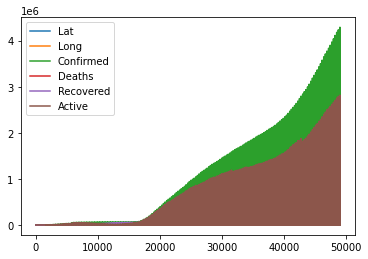

In [33]:
data1.plot()

Question 06 : Show tree map of tatal Death / 100 cases  around the world 

In [34]:
fig = px.treemap(data, path=["Country/Region"], values="Deaths / 100 Cases", height=700, title="TotalCases of each country in a tree map")

fig.show()

Answer : Yeman heading ahead second is UK then Belgium. Eash colour for county make easy to understand for user then click by country they can get the number 

Question 07 : In addiction you can show some extra skill of youra 

In [39]:
#Python library for completing the country data from the country database to ready your dataset to be matched or aggregated to others
! pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 28.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=d86b04959610331fc85d5053ecce3adc72b07524a1b91f54c1972e1254850384
  Stored in directory: /root/.cache/pip/wheels/e2/aa/0f/c224e473b464387170b83ca7c66947b4a7e33e8d903a679748
Successfully built pycountry


In [40]:
import pycountry

worldometer= pd.read_csv('/content/drive/MyDrive/worldometer_data.csv')


worldometer['Country/Region'].replace('USA','United States', inplace=True)
worldometer['Country/Region'].replace('UAE','United Arab Emirates', inplace=True)
worldometer['Country/Region'].replace('Ivory Coast','Côte d\'Ivoire', inplace=True)
worldometer['Country/Region'].replace('S. Korea','Korea', inplace=True)
worldometer['Country/Region'].replace('N. Korea','Korea', inplace=True)
worldometer['Country/Region'].replace('DRC','Republic of the Congo', inplace=True)
worldometer['Country/Region'].replace('Channel Islands','Jersey', inplace=True)

exceptions = []

def get_alpha_3_code(cou):
    try:
        return pycountry.countries.search_fuzzy(cou)[0].alpha_3
    except:
        exceptions.append(cou)


worldometer['iso_alpha'] = worldometer['Country/Region'].apply(lambda x : get_alpha_3_code(x))

# removeing exceptions
for exc in exceptions:
    worldometer = worldometer[worldometer['Country/Region']!=exc]
    
    
fig = px.scatter_geo(worldometer, locations="iso_alpha",
                     color="Continent", # which column to use to set the color of markers
                     hover_name="Country/Region", # column added to hover information
                     size="TotalCases", # size of markers
                     projection="orthographic")
fig

Answer : I present Globe with continent total cases and colour and the size reflects the higher to lower 

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
full_grouped = pd.read_csv('/content/drive/MyDrive/full_grouped.csv')

india = full_grouped[full_grouped['Country/Region'] == 'India']
us = full_grouped[full_grouped['Country/Region'] == 'US']
russia = full_grouped[full_grouped['Country/Region'] == 'Russia']
china = full_grouped[full_grouped['Country/Region'] == 'China']
df = pd.concat([india,us,russia,china], axis=0)

# Watch as bars chart covid cases changes


fig = px.bar(df, x="Country/Region", y="Confirmed", color="Country/Region",
  animation_frame="Date", animation_group="Country/Region", range_y=[0,df['Confirmed'].max() + 100000])

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1

fig

I present an animation which is shows confirmed cases from Jan 2020 to Aug 2020 in big populated countries which is India, US, Russia and china 